<a href="https://colab.research.google.com/github/Maleshhussen35/traffic-sign-/blob/main/NLP_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First step we supoosed to install required libarries

In [2]:
# Install necessary libraries

!pip install tensorflow numpy pandas scikit-learn

step 2: importation of the libarries

In [6]:
import numpy as np

import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

step 3 prepartion of the dataset

In [4]:
# Define the dataset
data = {
    "text": [
        "What is the schedule for tomorrow?",
        "When is the next parent-teacher meeting?",
        "What is the homework for Math?",
        "Hi",
        "Bye",
        "How do I check my semester fees?",
        "Where can I find my exam results?",
        "How do I vote in the student council election?",
        "How do I update my personal information on the portal?",
        "What should I do if I fail an exam?",
        "How do I register for units for the next semester?",
        "How do I submit my project report?",
        "Where can I find the academic calendar?",
        "How do I apply for a leave of absence?",
        "How do I check my attendance record?",
        "How do I contact my academic advisor?",
        "How do I apply for a scholarship?",
        "How do I access the online library?",
        "How do I reset my portal password?",
        "How do I download my fee receipt?",
        "How do I apply for re-evaluation of my exam paper?",
        "How do I register for extracurricular activities?",
        "How do I check my graduation status?",
        "How do I apply for a transcript?",
        "How do I report a technical issue with the portal?"
    ],
    "intent": [
        "ask_schedule",
        "ask_event",
        "ask_homework",
        "greet",
        "goodbye",
        "ask_fees",
        "ask_results",
        "ask_election",
        "ask_info_update",
        "ask_fail_exam",
        "ask_unit_registration",
        "ask_project_submission",
        "ask_academic_calendar",
        "ask_leave_absence",
        "ask_attendance",
        "ask_contact_advisor",
        "ask_scholarship",
        "ask_library_access",
        "ask_password_reset",
        "ask_fee_receipt",
        "ask_reevaluation",
        "ask_extracurricular",
        "ask_graduation_status",
        "ask_transcript",
        "report_technical_issue"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)

                                                 text                  intent
0                  What is the schedule for tomorrow?            ask_schedule
1            When is the next parent-teacher meeting?               ask_event
2                      What is the homework for Math?            ask_homework
3                                                  Hi                   greet
4                                                 Bye                 goodbye
5                    How do I check my semester fees?                ask_fees
6                   Where can I find my exam results?             ask_results
7      How do I vote in the student council election?            ask_election
8   How do I update my personal information on the...         ask_info_update
9                 What should I do if I fail an exam?           ask_fail_exam
10  How do I register for units for the next semes...   ask_unit_registration
11                 How do I submit my project report?  ask_proje

the 4 step we supoosed to preprocess the data

In [8]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
word_index = tokenizer.word_index

# Pad sequences to ensure uniform length
max_len = 10
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Encode labels (intents)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['intent'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print("Vocabulary size:", len(word_index))
print("Padded sequences shape:", padded_sequences.shape)
print("Labels shape:", labels.shape)

Vocabulary size: 77
Padded sequences shape: (25, 10)
Labels shape: (25,)


to build the rnn model

In [9]:
# Define the RNN model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

training the model

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.0406 - loss: 3.2193 - val_accuracy: 0.0000e+00 - val_loss: 3.2258
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0000e+00 - loss: 3.2194 - val_accuracy: 0.0000e+00 - val_loss: 3.2332
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1375 - loss: 3.2159 - val_accuracy: 0.0000e+00 - val_loss: 3.2421
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0406 - loss: 3.2124 - val_accuracy: 0.0000e+00 - val_loss: 3.2502
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0719 - loss: 3.2023 - val_accuracy: 0.0000e+00 - val_loss: 3.2581
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0406 - loss: 3.2040 - val_accuracy: 0.0000e+00 - val_loss: 3.2680
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0812 - loss: 3.2002 - val_accuracy: 0.0000e+00 - val_loss: 3.2782
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0406 - loss: 3.1950 - val_acc

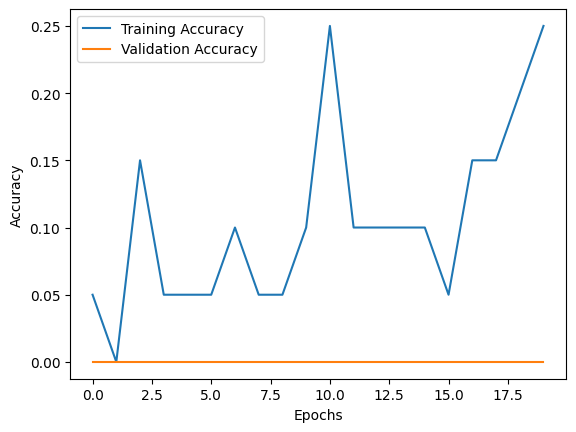

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=8)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

testing the model


In [11]:
# Function to predict intent
def predict_intent(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

# Test the chatbot
test_queries = [
    "How do I check my semester fees?",
    "What should I do if I fail an exam?",
    "How do I register for units?",
    "Hi",
    "How do I reset my password?"
]

for query in test_queries:
    intent = predict_intent(query)
    print(f"User: {query}")
    print(f"Intent: {intent}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
User: How do I check my semester fees?
Intent: ask_academic_calendar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
User: What should I do if I fail an exam?
Intent: ask_academic_calendar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
User: How do I register for units?
Intent: ask_academic_calendar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
User: Hi
Intent: greet

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
User: How do I reset my password?
Intent: ask_contact_advisor



saving the model

In [12]:
# Save the model and tokenizer
model.save("school_portal_chatbot_model.h5")
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("Model and tokenizer saved successfully.")

Model and tokenizer saved successfully.
